https://archive.ics.uci.edu/dataset/352/online+retail database

*Importing libraries*

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

*Importing the data*

In [66]:
initial_data = pd.read_excel(r'E:\git-hub_projects\datasets\Online Retail.xlsx')
initial_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


*Cleaning the data*

In [106]:
cleaned_data = initial_data.copy()

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'InvoiceDate'}>],
       [<Axes: title={'center': 'UnitPrice'}>,
        <Axes: title={'center': 'CustomerID'}>]], dtype=object)

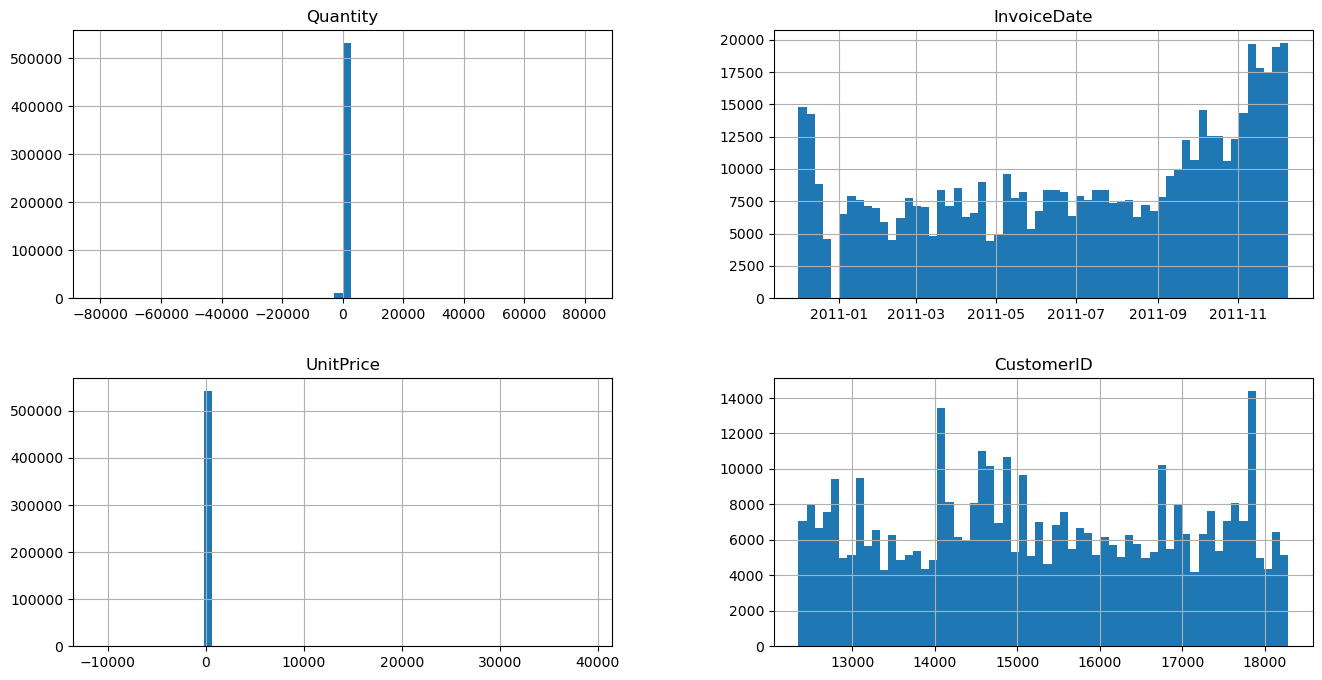

In [107]:
cleaned_data.hist(bins=60, figsize=(16,8))

*There is some anomalies in the UnitPrice and Quantity features*

<Axes: xlabel='index', ylabel='Quantity'>

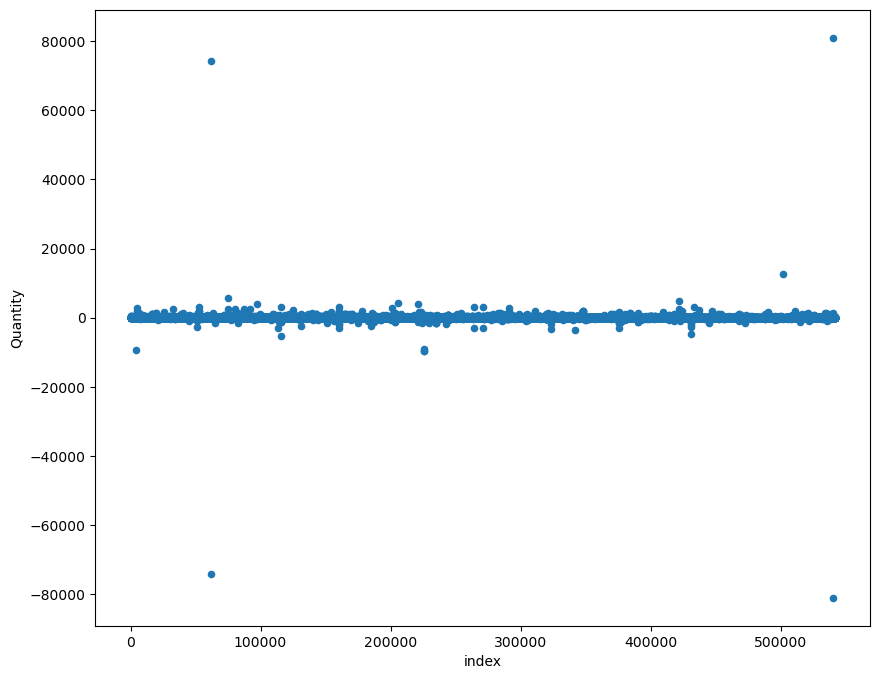

In [108]:
cleaned_data.reset_index().plot(kind='scatter', y='Quantity', x='index', figsize=(10,8))

In [109]:
cleaned_data = cleaned_data[(cleaned_data['Quantity'] > -10000) & (cleaned_data['Quantity'] < 10000)] 

<Axes: xlabel='index', ylabel='Quantity'>

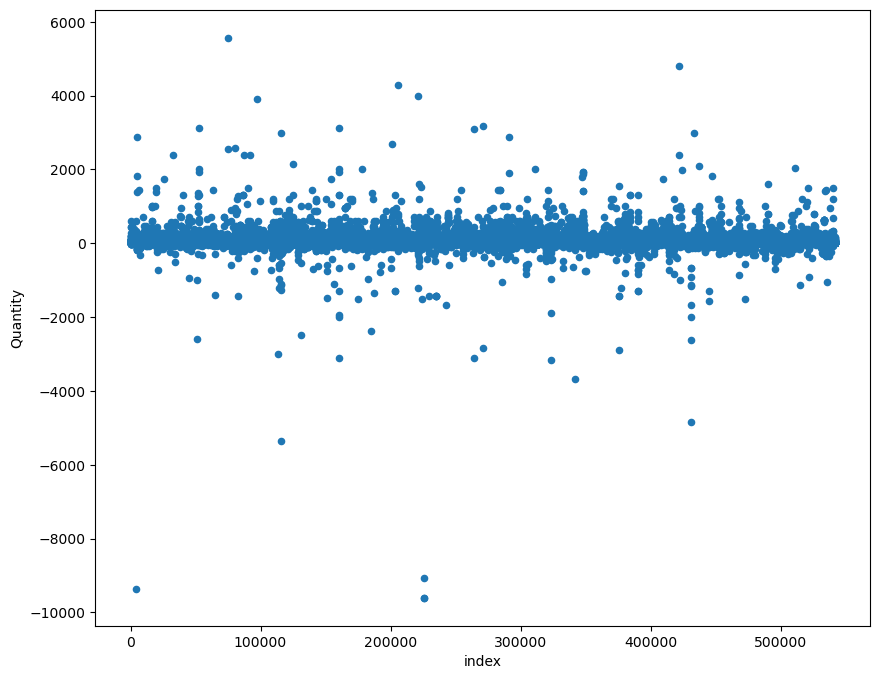

In [110]:
cleaned_data.reset_index().plot(kind='scatter', y='Quantity', x='index', figsize=(10,8))

In [111]:
cleaned_data[cleaned_data['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


*Some of this data can be like retunring from the store but is some data that i'm not going to use so i can delete this values (1.97% of the dataset)*

In [112]:
cleaned_data = cleaned_data[cleaned_data['Quantity'] > 0]

<Axes: xlabel='index', ylabel='Quantity'>

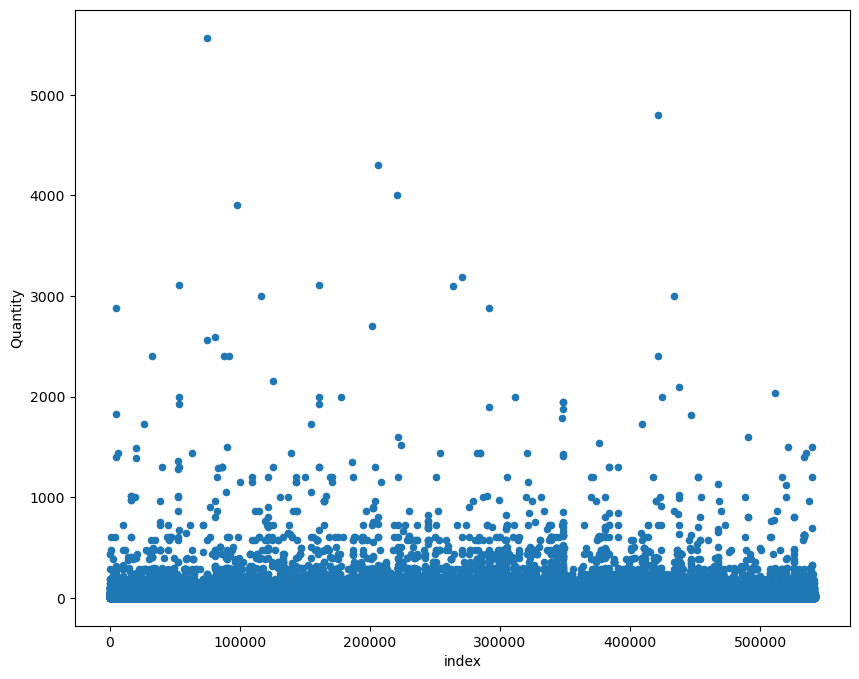

In [113]:
cleaned_data.reset_index().plot(kind='scatter', y='Quantity', x='index', figsize=(10,8))

In [114]:
cleaned_data[cleaned_data['Quantity'] > 500]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
730,536437,17021,NAMASTE SWAGAT INCENSE,600,2010-12-01 12:12:00,0.24,13694.0,United Kingdom
3917,536736,22616,PACK OF 12 LONDON TISSUES,600,2010-12-02 12:59:00,0.29,17381.0,United Kingdom
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
4946,536830,21915,RED HARMONICA IN BOX,1400,2010-12-02 17:38:00,1.06,16754.0,United Kingdom
...,...,...,...,...,...,...,...,...
534952,581175,23084,RABBIT NIGHT LIGHT,1440,2011-12-07 15:16:00,1.79,14646.0,Netherlands
537883,581375,21137,BLACK RECORD COVER FRAME,960,2011-12-08 12:36:00,3.39,16210.0,United Kingdom
540061,581457,23543,WALL ART KEEP CALM,698,2011-12-08 18:43:00,4.15,18102.0,United Kingdom
540070,581458,22197,POPCORN HOLDER,1500,2011-12-08 18:45:00,0.72,17949.0,United Kingdom


*Really sparced data and is only 304 values*

In [115]:
cleaned_data = cleaned_data[cleaned_data['Quantity'] < 500]

*Now we will check the Unitprice feature*

<Axes: xlabel='index', ylabel='UnitPrice'>

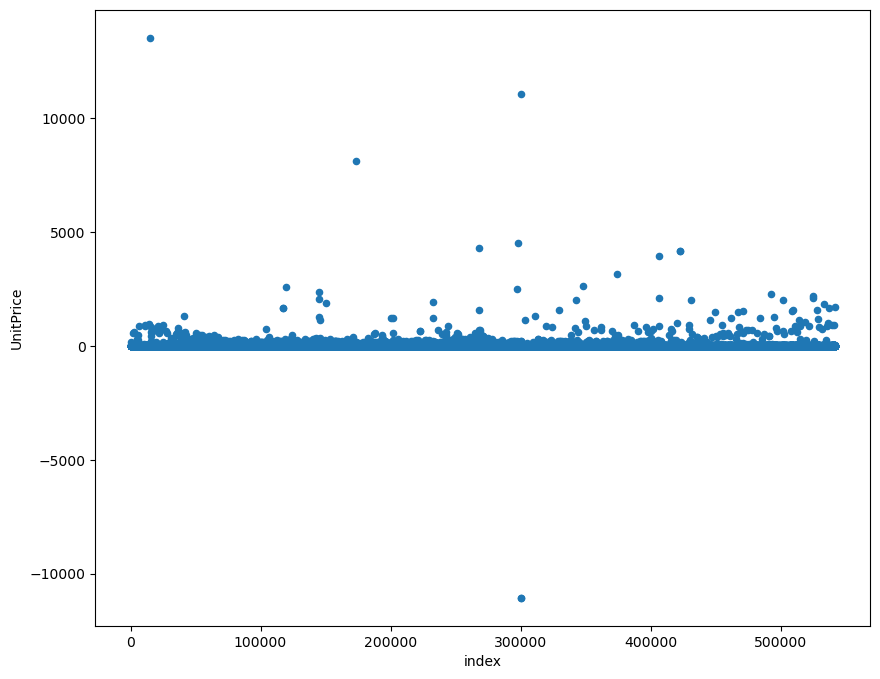

In [116]:
cleaned_data.reset_index().plot(kind='scatter', y='UnitPrice', x='index', figsize=(10,8))

<Axes: xlabel='index', ylabel='UnitPrice'>

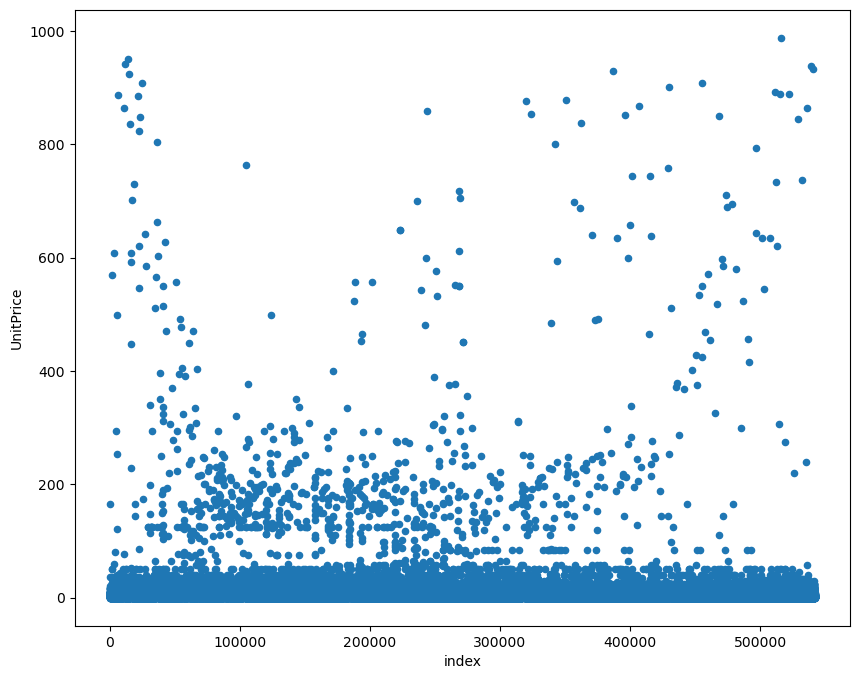

In [117]:
cleaned_data = cleaned_data[(cleaned_data['UnitPrice'] > -10000) & (cleaned_data['UnitPrice'] < 1000)]
cleaned_data.reset_index().plot(kind='scatter', y='UnitPrice', x='index', figsize=(10,8))

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'InvoiceDate'}>],
       [<Axes: title={'center': 'UnitPrice'}>,
        <Axes: title={'center': 'CustomerID'}>]], dtype=object)

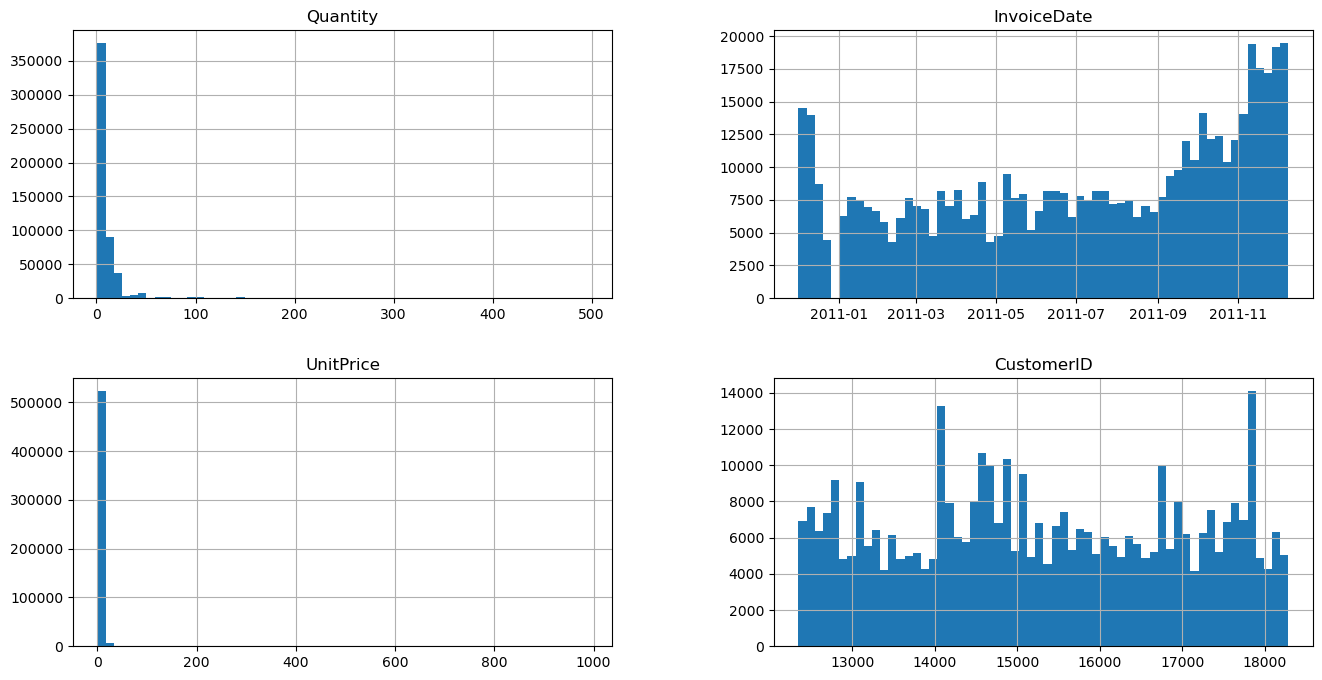

In [118]:
cleaned_data.hist(bins=60, figsize=(16,8))

*As there is no more anomalies with the numerical data, now we will check the nan values in the dataset*

In [119]:
cleaned_data.isna().sum()

InvoiceNo           0
StockCode           0
Description       582
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133301
Country             0
dtype: int64

*Customer ID and article descritpion aren't features that we will be using on this analysis*

In [120]:
cleaned_data = cleaned_data[['Quantity', 'InvoiceDate', 'UnitPrice', 'Country']]

In [121]:
cleaned_data

,Quantity,InvoiceDate,UnitPrice,Country
0,6,2010-12-01 08:26:00,2.55,United Kingdom
1,6,2010-12-01 08:26:00,3.39,United Kingdom
2,8,2010-12-01 08:26:00,2.75,United Kingdom
3,6,2010-12-01 08:26:00,3.39,United Kingdom
4,6,2010-12-01 08:26:00,3.39,United Kingdom
...,...,...,...,...
541904,12,2011-12-09 12:50:00,0.85,France
541905,6,2011-12-09 12:50:00,2.10,France
541906,4,2011-12-09 12:50:00,4.15,France
541907,4,2011-12-09 12:50:00,4.15,France


**Preparing the data**

In [123]:
prepared_data = cleaned_data.copy()

In [124]:
prepared_data.dtypes

Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
dtype: object